In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
df.shape

(1599, 12)

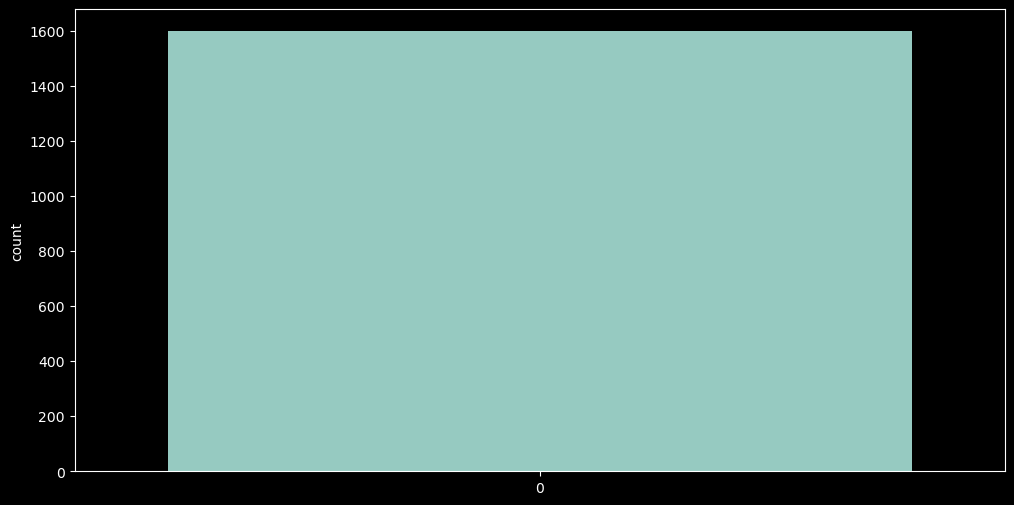

In [32]:
plt.style.use('dark_background')
plt.figure(figsize = (12,6))
sns.countplot(df['quality'])
plt.show()

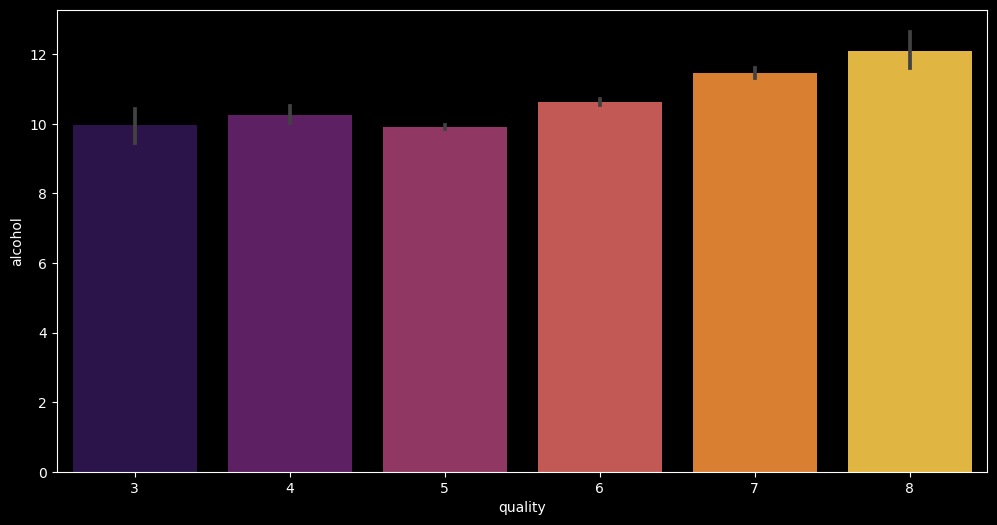

In [33]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')
plt.show()

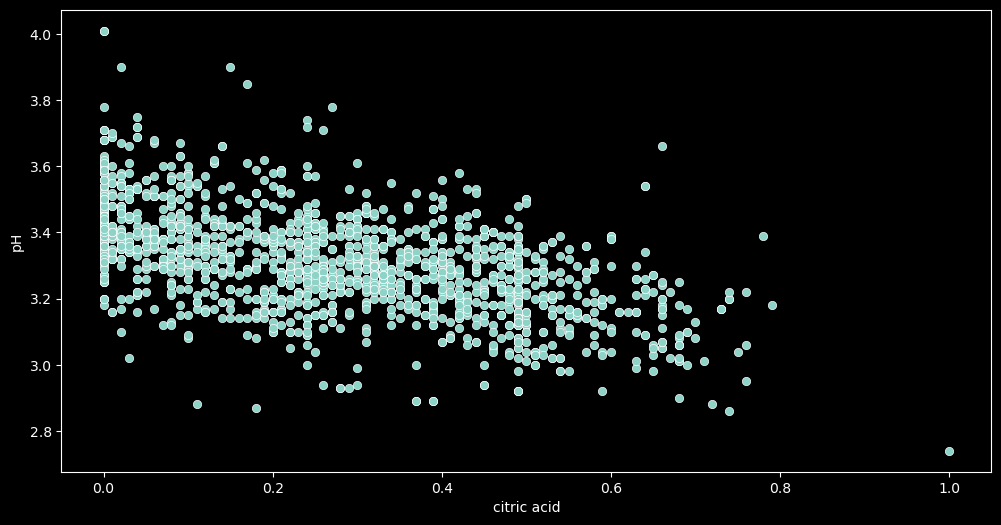

In [34]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y = 'pH', data = df)
plt.show()


<Figure size 1200x600 with 0 Axes>

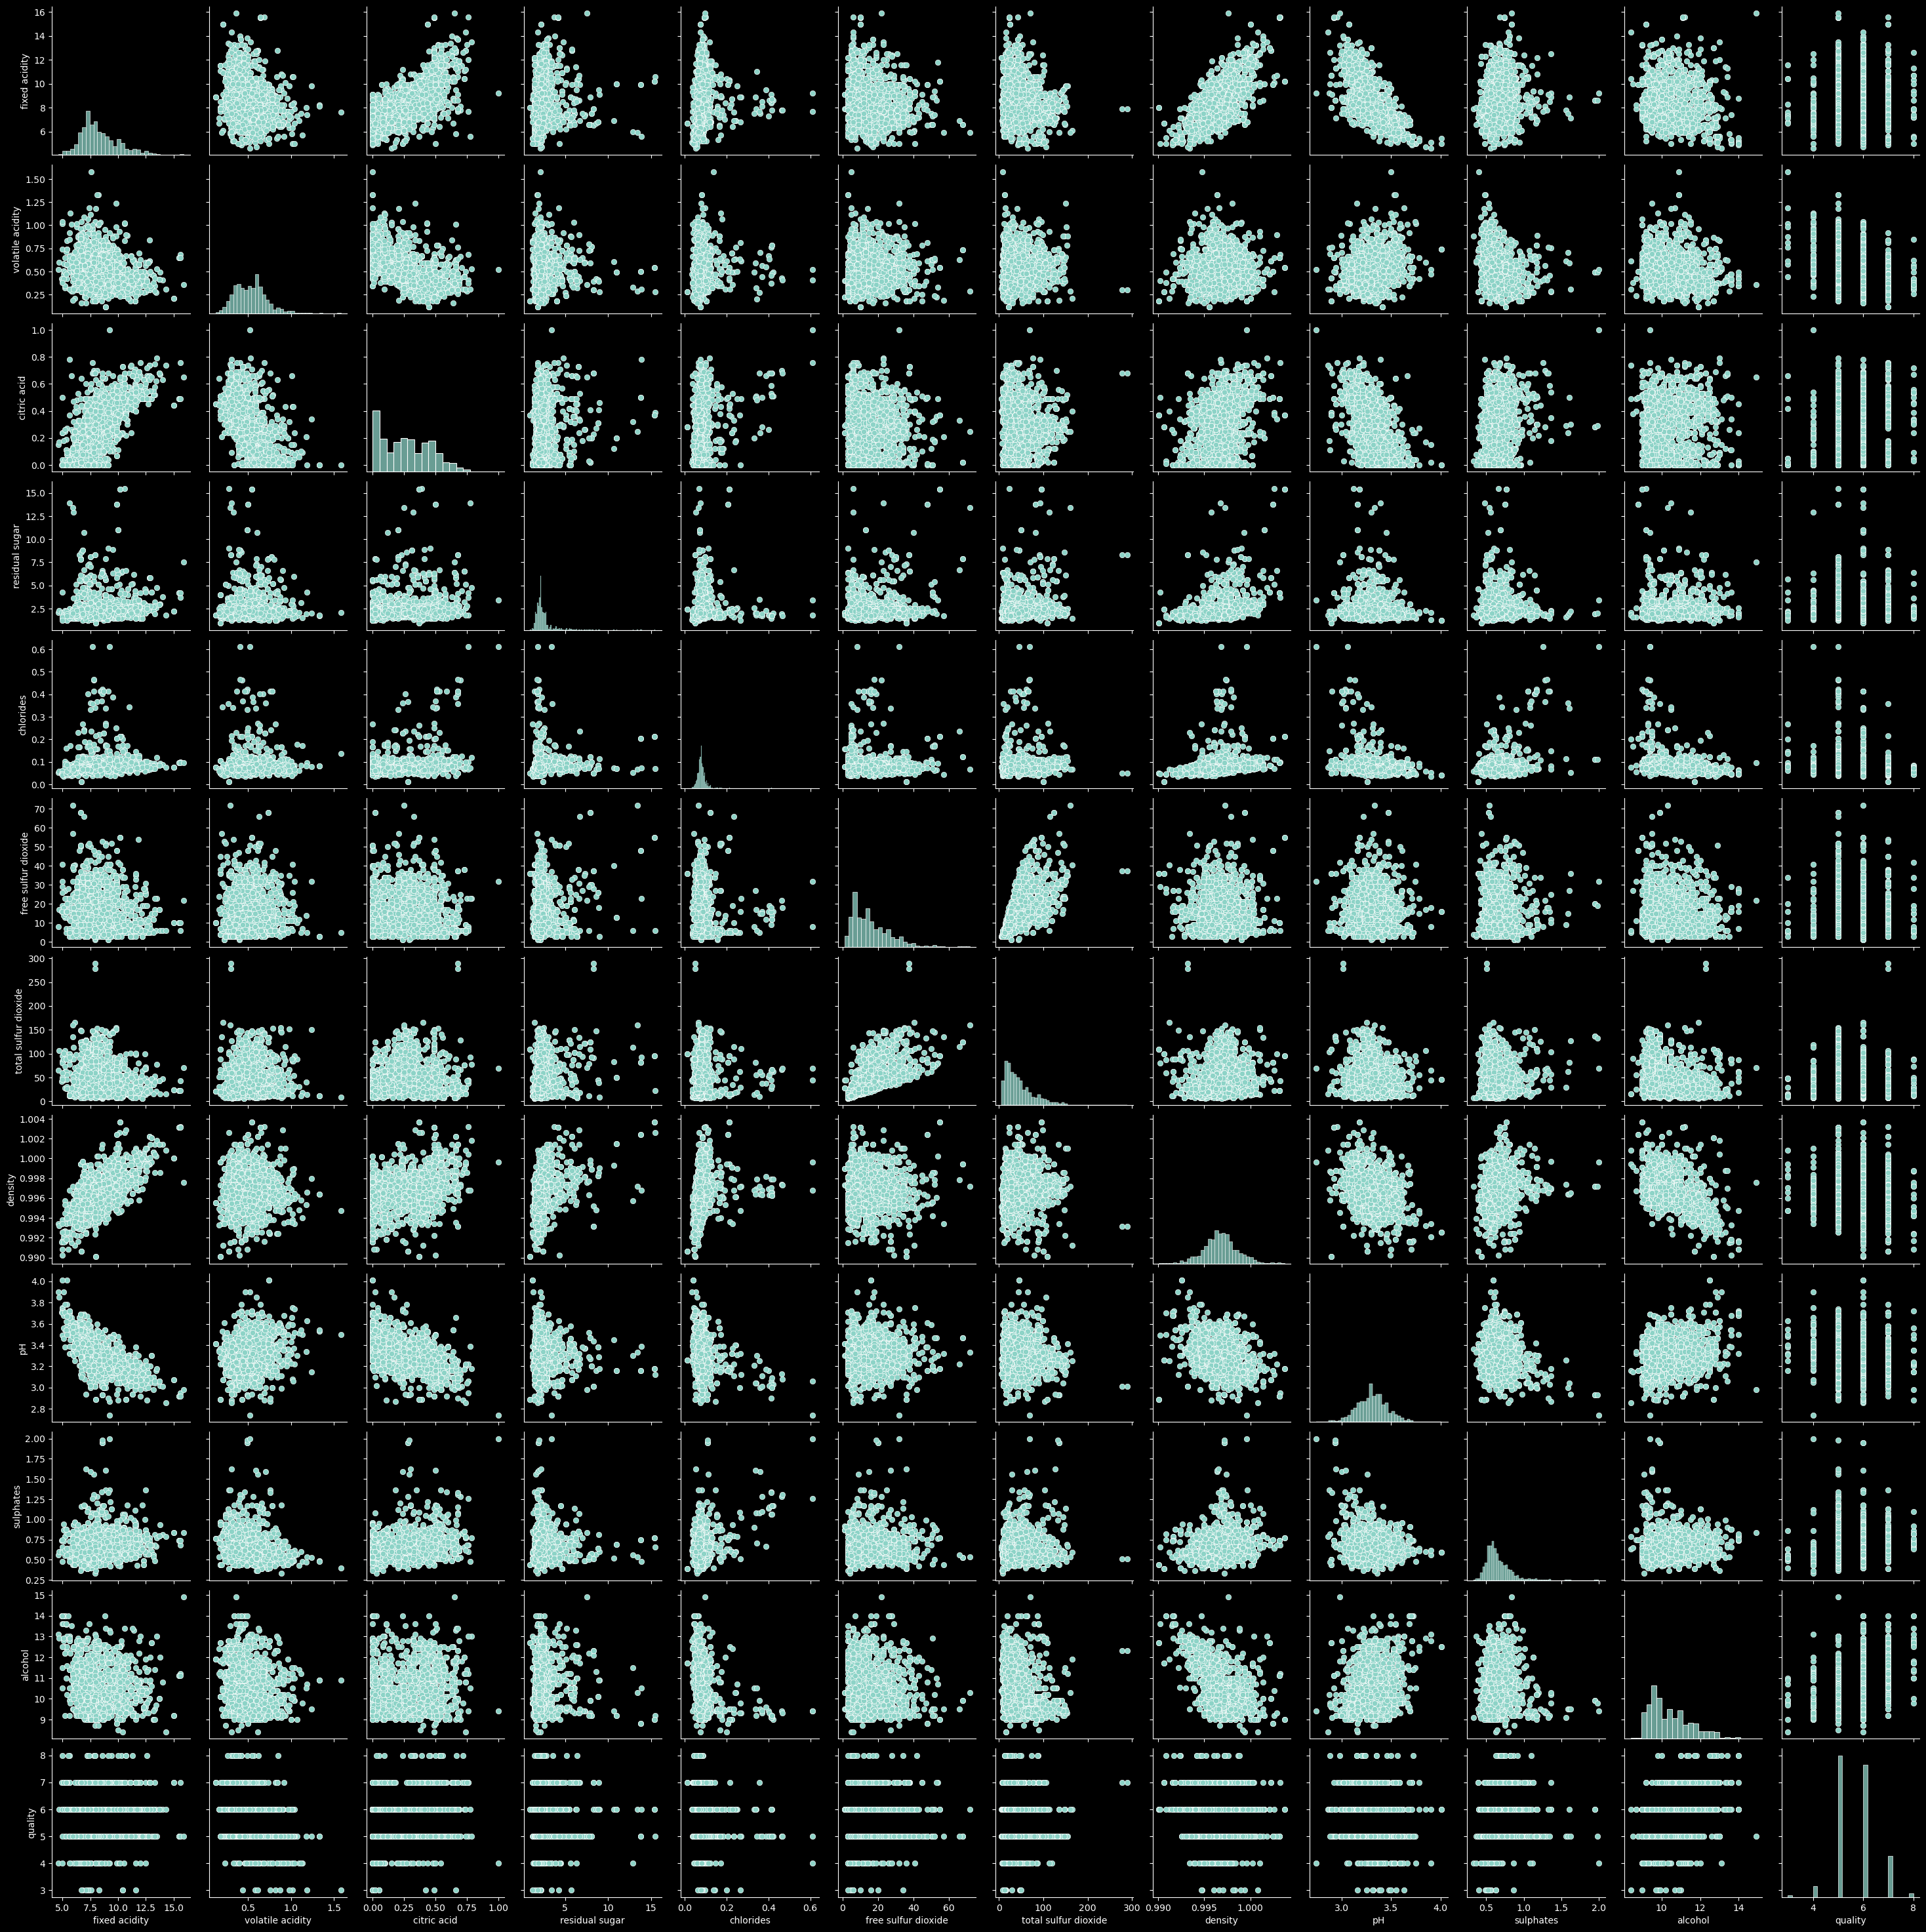

In [35]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

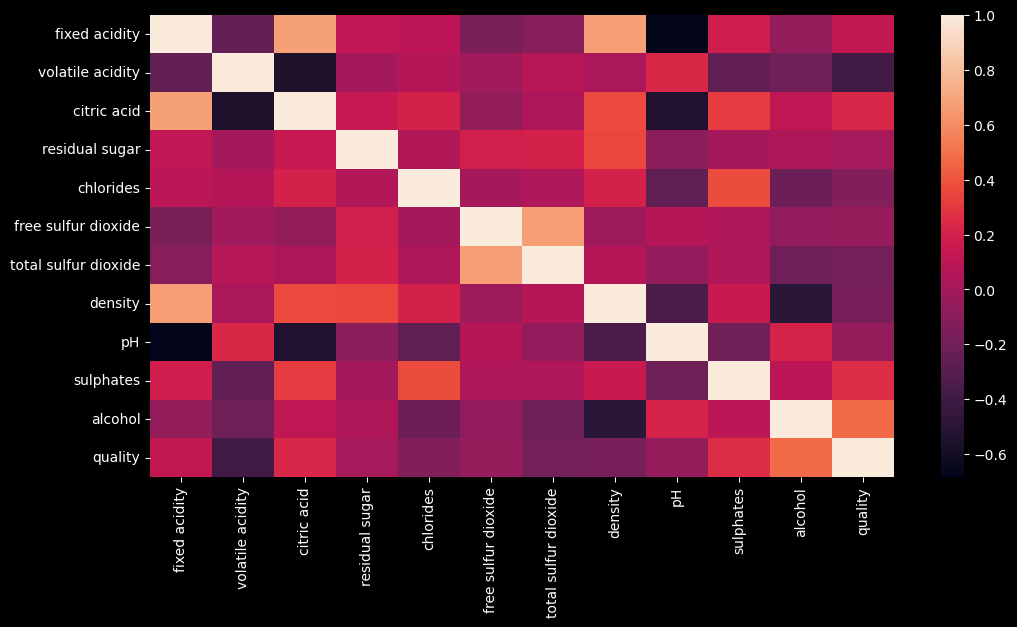

In [36]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [37]:
x=df.drop(['quality'], axis=1)
y=df['quality']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std, y_train)
predictions = lr.predict(x_test_std)
accuracy_score(y_test, predictions)

0.634375

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)
accuracy_score(y_test, dt.predict(x_test_std))

0.678125

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train_std, y_train)
accuracy_score(y_test, rf.predict(x_test_std))

0.71875